In [6]:
!pip3 install numpy pandas seaborn matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 332.3 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 935.1 kB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 652.1 kB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 567.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 936.3 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached 

In [10]:
!pip3 install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 1.6 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [11]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


In [14]:
df = pd.read_csv("/Users/rohitkumar/Downloads/crime.csv")


In [15]:
# Checking the dimensions of the dataset
print(df.shape)

(1005101, 28)


In [16]:
# Listing the columns of the dataset
print(df.columns)


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [17]:
# Viewing the first five rows of the dataset
print(df.head())


       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630     4   

    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Wilshire          784         1     510   
1     Central          182         1     330   
2   Southwest          356         1     480   
3    Van Nuys          964         1     343   
4  Hollenbeck          413         1     510   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2          

In [18]:
# Viewing the last five rows of the dataset
print(df.tail())

             DR_NO               Date Rptd                DATE OCC  TIME OCC  \
1005096  250304214  02/23/2025 12:00:00 AM  02/21/2025 12:00:00 AM      1530   
1005097  250304203  02/20/2025 12:00:00 AM  02/13/2025 12:00:00 AM      2100   
1005098  250304284  03/31/2025 12:00:00 AM  03/30/2025 12:00:00 AM      2100   
1005099  251604136  02/27/2025 12:00:00 AM  02/27/2025 12:00:00 AM      1550   
1005100  251904210  03/25/2025 12:00:00 AM  03/25/2025 12:00:00 AM      1235   

         AREA  AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
1005096     3  Southwest          358         1     510   
1005097     3  Southwest          325         1     522   
1005098     3  Southwest          328         1     510   
1005099    16   Foothill         1664         1     510   
1005100    19    Mission         1944         2     850   

                                               Crm Cd Desc  ... Status  \
1005096                                   VEHICLE - STOLEN  ...     IC   
1005097  VEHICLE

In [19]:
# Viewing all the information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005101 entries, 0 to 1005100
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005101 non-null  int64  
 1   Date Rptd       1005101 non-null  object 
 2   DATE OCC        1005101 non-null  object 
 3   TIME OCC        1005101 non-null  int64  
 4   AREA            1005101 non-null  int64  
 5   AREA NAME       1005101 non-null  object 
 6   Rpt Dist No     1005101 non-null  int64  
 7   Part 1-2        1005101 non-null  int64  
 8   Crm Cd          1005101 non-null  int64  
 9   Crm Cd Desc     1005101 non-null  object 
 10  Mocodes         853395 non-null   object 
 11  Vict Age        1005101 non-null  int64  
 12  Vict Sex        860371 non-null   object 
 13  Vict Descent    860359 non-null   object 
 14  Premis Cd       1005085 non-null  float64
 15  Premis Desc     1004513 non-null  object 
 16  Weapon Used Cd  327256 non-null   fl

In [20]:
# Descriptive statistics of the dataset
print(df.describe())

              DR_NO      TIME OCC          AREA   Rpt Dist No      Part 1-2  \
count  1.005101e+06  1.005101e+06  1.005101e+06  1.005101e+06  1.005101e+06   
mean   2.202249e+08  1.339913e+03  1.069116e+01  1.115576e+03  1.400310e+00   
std    1.320027e+07  6.510494e+02  6.110379e+00  6.111726e+02  4.899614e-01   
min    8.170000e+02  1.000000e+00  1.000000e+00  1.010000e+02  1.000000e+00   
25%    2.106169e+08  9.000000e+02  5.000000e+00  5.870000e+02  1.000000e+00   
50%    2.209160e+08  1.420000e+03  1.100000e+01  1.139000e+03  1.000000e+00   
75%    2.311104e+08  1.900000e+03  1.600000e+01  1.613000e+03  2.000000e+00   
max    2.521041e+08  2.359000e+03  2.100000e+01  2.199000e+03  2.000000e+00   

             Crm Cd      Vict Age     Premis Cd  Weapon Used Cd      Crm Cd 1  \
count  1.005101e+06  1.005101e+06  1.005085e+06   327256.000000  1.005090e+06   
mean   5.001553e+02  2.891437e+01  3.056160e+02      363.955995  4.999158e+02   
std    2.052640e+02  2.199344e+01  2.193077e+

In [21]:
# Checking for missing values in the dataset and their total count
print(df.isnull().sum())

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151706
Vict Age                0
Vict Sex           144730
Vict Descent       144742
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677845
Weapon Desc        677845
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935945
Crm Cd 3          1002787
Crm Cd 4          1005037
LOCATION                0
Cross Street       850864
LAT                     0
LON                     0
dtype: int64


In [24]:
# Counting non-null values in each column
print(df.count())

DR_NO             1005101
Date Rptd         1005101
DATE OCC          1005101
TIME OCC          1005101
AREA              1005101
AREA NAME         1005101
Rpt Dist No       1005101
Part 1-2          1005101
Crm Cd            1005101
Crm Cd Desc       1005101
Mocodes            853395
Vict Age          1005101
Vict Sex           860371
Vict Descent       860359
Premis Cd         1005085
Premis Desc       1004513
Weapon Used Cd     327256
Weapon Desc        327256
Status            1005100
Status Desc       1005101
Crm Cd 1          1005090
Crm Cd 2            69156
Crm Cd 3             2314
Crm Cd 4               64
LOCATION          1005101
Cross Street       154237
LAT               1005101
LON               1005101
dtype: int64


In [25]:
# Cleaning the dataset by dropping rows with missing values
df.dropna(inplace=True)

In [26]:
# Creating a numpy array from the crime rate
crime_code_array = np.array(df["Crm Cd"])
print(crime_code_array)


[761 761 121 210 821 122 910 210 210 820]


In [27]:
# Filtering years with crime data greater than 50
high_crime_years = df[df["Crm Cd"] > 50]
print(high_crime_years)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
49194   200613424  08/02/2020 12:00:00 AM  08/02/2020 12:00:00 AM      2030   
142122  201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      2135   
363738  210617136  10/08/2021 12:00:00 AM  10/07/2021 12:00:00 AM      1950   
372508  210209196  05/08/2021 12:00:00 AM  05/08/2021 12:00:00 AM       230   
490088  220600626  04/27/2022 12:00:00 AM  04/23/2022 12:00:00 AM      2300   
537836  221718232  12/25/2022 12:00:00 AM  12/25/2022 12:00:00 AM      1150   
586005  221401314  11/10/2022 12:00:00 AM  11/10/2022 12:00:00 AM      2117   
728573  231717599  11/15/2023 12:00:00 AM  11/15/2023 12:00:00 AM       400   
809411  231915572  10/21/2023 12:00:00 AM  10/21/2023 12:00:00 AM         1   
934736  241905348  02/04/2024 12:00:00 AM  02/03/2024 12:00:00 AM      1100   

        AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
49194      6   Hollywood          657         1     761   
142122    19

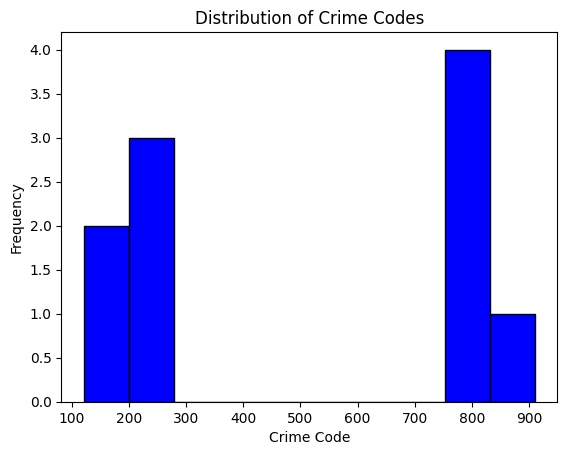

In [28]:
# Creating a histogram for the "Crm Cd" column
plt.hist(df["Crm Cd"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Crime Code")
plt.ylabel("Frequency")
plt.title("Distribution of Crime Codes")
plt.show()

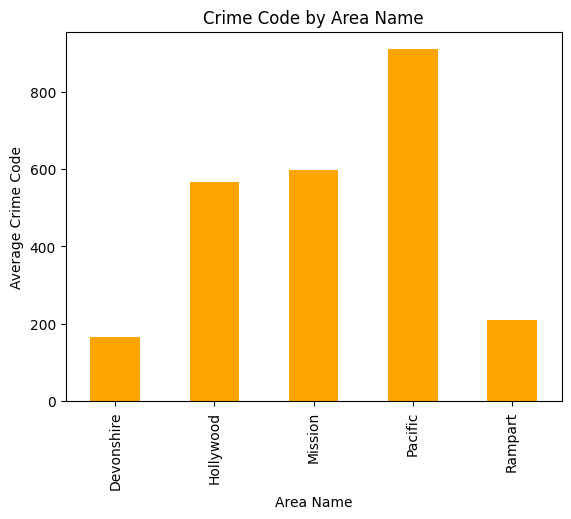

In [29]:
# Creating a bar chart to show the average crime code by area
avg_crime_code_by_area = df.groupby("AREA NAME")["Crm Cd"].mean()
avg_crime_code_by_area.plot(kind='bar', color='orange')
plt.xlabel("Area Name")
plt.ylabel("Average Crime Code")
plt.title("Crime Code by Area Name")
plt.show()

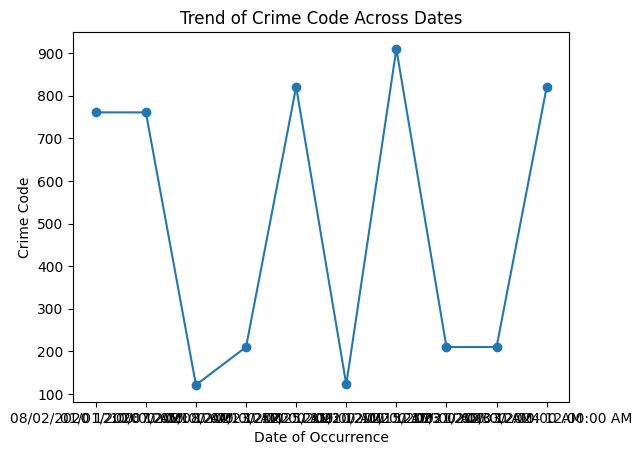

In [30]:
# Creating a line graph to show the trend of crime code across dates
plt.plot(df["DATE OCC"], df["Crm Cd"], marker='o')
plt.xlabel("Date of Occurrence")
plt.ylabel("Crime Code")
plt.title("Trend of Crime Code Across Dates")
plt.show()

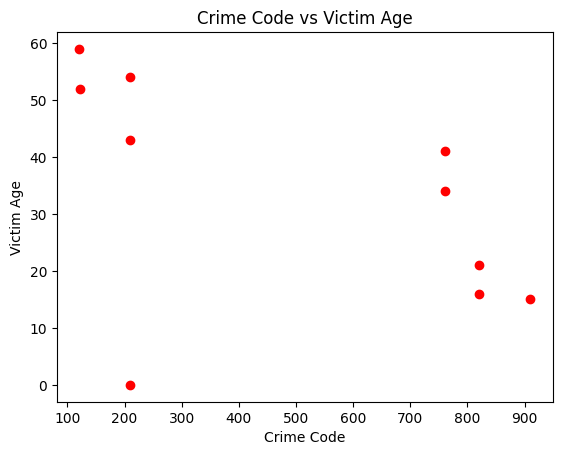

In [31]:
# Scatter plot between 'Crm Cd' and 'Vict Age'
plt.scatter(df["Crm Cd"], df["Vict Age"], color='red')
plt.xlabel("Crime Code")
plt.ylabel("Victim Age")
plt.title("Crime Code vs Victim Age")
plt.show()

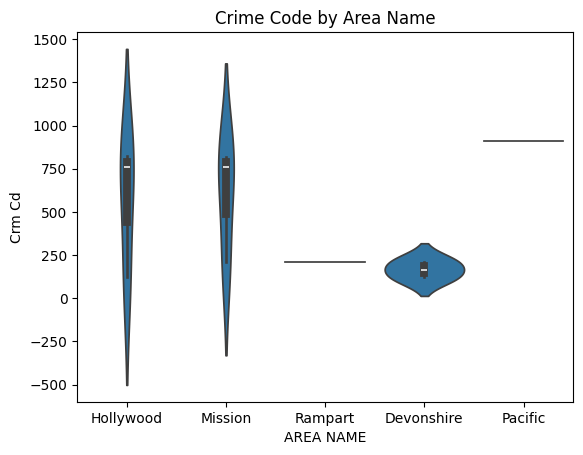

In [34]:
# Violin plot for crime code distribution by area
sns.violinplot(x="AREA NAME", y="Crm Cd", data=df)
plt.title("Crime Code by Area Name")
plt.show()


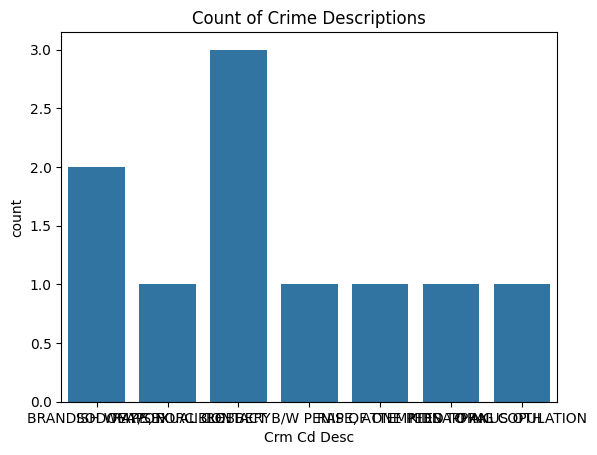

In [36]:
# Count plot for crime descriptions
sns.countplot(x="Crm Cd Desc", data=df)
plt.title("Count of Crime Descriptions")
plt.show()


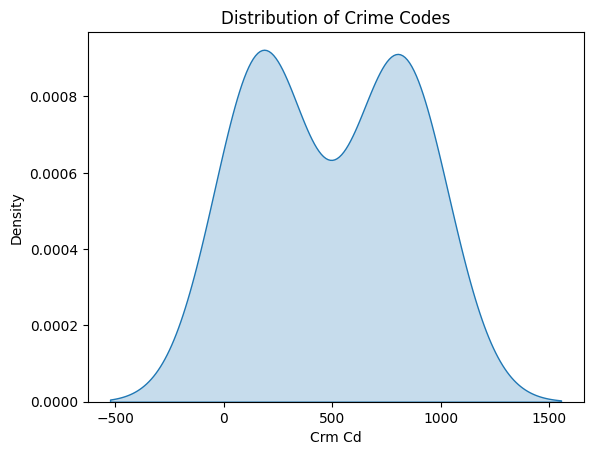

In [37]:
# KDE plot for the distribution of crime codes
sns.kdeplot(df["Crm Cd"], shade=True)
plt.title("Distribution of Crime Codes")
plt.show()